**Introduction:**


In this notebook, we will evaluate the performance of three popular machine learning models: Logistic Regression, Decision Tree, and Random Forest. Each model will be tested using key performance metrics, including accuracy and F1-Score, to assess how well they classify the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learnig
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
train = pd.read_csv("/content/mushroom_cleaned.csv")

In [ ]:
print(train.shape)
train.head()

(53595, 9)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
X = train.drop('class',axis=1)
y = train['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_distribution = y_train.value_counts()
print(class_distribution)

class_distribution_test = y_test.value_counts()
print(class_distribution_test)



class
1    23446
0    19430
Name: count, dtype: int64
class
1    5876
0    4843
Name: count, dtype: int64


1 . **Logistique Regression**:




Logistic Regression is one of the oldest and most basic algorithms to solve a classification problem.





Accuracy: 0.63
F1-Score: 0.68
Confusion Matrix:
[[2641 2202]
 [1757 4119]]


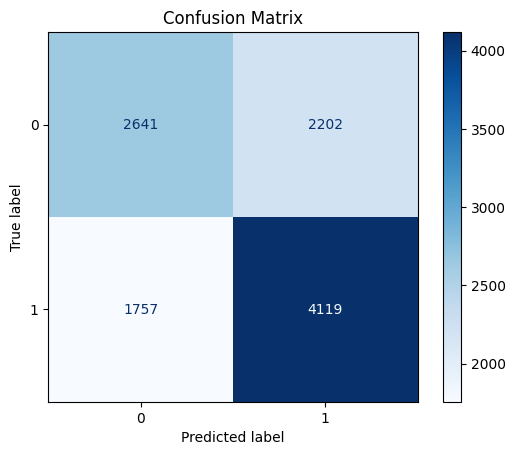

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


**2. Decision Tree:**

A Decision Tree is a non-parametric supervised learning method used for classification and regression.

Accuracy: 0.97
F1-Score: 0.98
Confusion Matrix:
[[4708  135]
 [ 138 5738]]


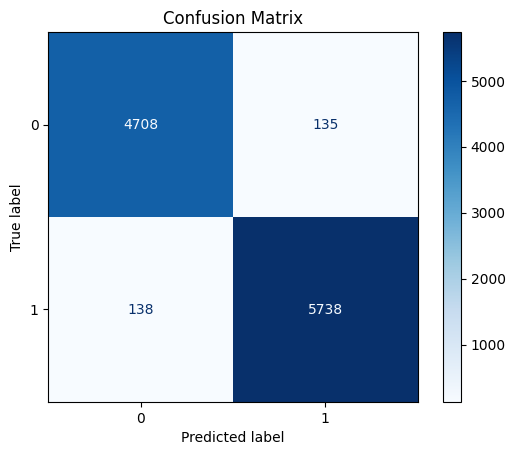

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**3.  Random Forest:**

The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. I found out that max_depth=15 is a good value for this feature-rich dataset.

Accuracy with n_estimators=200 and max_depth=15: 0.99
F1-Score with n_estimators=200 and max_depth=15: 0.99
Confusion Matrix:
[[4792   51]
 [  83 5793]]


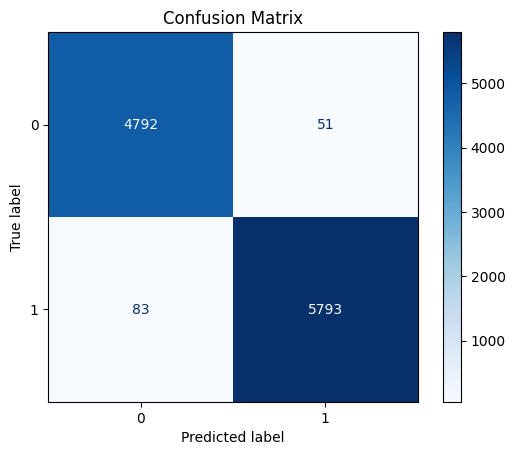

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with n_estimators=200 and max_depth=15: {accuracy:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-Score with n_estimators=200 and max_depth=15: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
